In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

МОДЕЛЬ ИЗИНГА РЕАЛИЗОВАННАЯ АЛГОРИТМОМ ЧЕРВЯ


Начальные данные:

1. T-Температурный коэффициент T0/J

2. L-Размер модели L

3. nsteps - число шагов


In [ ]:
T = 2.27
L = 10
nsteps = 1000000
N = L**2

Создание наборов соседей для каждой точки

In [ ]:
nbr = {i: ((i // L) * L + (i + 1) % L, (i + L) % N,
       (i // L) * L + (i - 1) % L, (i - L) % N) for i in range(N)}

Создание набора ребер 

In [ ]:
bonds = {}
for i in range(N):
    for j in nbr[i]:
        if tuple(sorted([i, j])) not in bonds.keys():
            bonds[tuple(sorted([i, j]))] = 0

Функция алгоритма червя

Случайным образом выбираемм начало(I) и конец (M) червя, затем так же случайным оразом выбираем соседнее ребро относительно начала, обновляем вес ребра с вероятностями 

K / (nb + 1.0) если прибовляем +1

nb * inv_K    если отнимаем -1

Далее обновляем конец червя (M = new_M) и начинаем все заново
Если начало и конец червя совпали то считаем энергию (E_tot += - T * Nb)


In [ ]:
def worm_alg(bonds,  T,  nsteps):
    
    K = 1.0 / T
    inv_K = 1.0 / K
    Z = 0.0
    Nb = 0
    E_tot = 0.0
    I = 0
    M = 0
    N_b2=0
    N_b=0
    
        
    for step in range(nsteps):
        if I == M:
            I = random.randrange(N)
            M = I
            Z += 1.0

            N_b2+=(Nb*Nb-Nb)
            N_b+=Nb
            
            E_tot += - T * Nb
    
        new_M = random.choice(nbr[M])
        bond = tuple(sorted([M, new_M]))
        nb = bonds[bond]
        if random.uniform(0.0, 1.0) < 0.5:
            delta_nb = 1
            #P_acc = math.tanh(K)
            P_acc = K / (nb + 1.0)
        
        else:
            delta_nb = -1
        
            #P_acc = math.atanh(K)
            P_acc = nb * inv_K
        if random.uniform(0.0, 1.0) < P_acc:
            bonds[bond] += delta_nb
            Nb += delta_nb

            M = new_M
       
  
    
    return (((N_b2/Z)-(N_b/Z)**2)/float(N)) , (E_tot / Z / float(N))
   


Вывод конфигурации ребер при T=2.27


In [ ]:

a,b=worm_alg(bonds,  T,  nsteps)

#print(a)

print(bonds)

bonds = {}
for i in range(N):
    for j in nbr[i]:
        if tuple(sorted([i, j])) not in bonds.keys():
            bonds[tuple(sorted([i, j]))] = 0 



{(0, 1): 0, (0, 10): 1, (0, 9): 2, (0, 90): 1, (1, 2): 0, (1, 11): 0, (1, 91): 0, (2, 3): 0, (2, 12): 0, (2, 92): 0, (3, 4): 2, (3, 13): 2, (3, 93): 0, (4, 5): 0, (4, 14): 0, (4, 94): 2, (5, 6): 0, (5, 15): 1, (5, 95): 1, (6, 7): 0, (6, 16): 0, (6, 96): 0, (7, 8): 2, (7, 17): 0, (7, 97): 2, (8, 9): 0, (8, 18): 0, (8, 98): 0, (9, 19): 0, (9, 99): 0, (10, 11): 0, (10, 20): 1, (10, 19): 0, (11, 12): 0, (11, 21): 0, (12, 13): 0, (12, 22): 0, (13, 14): 0, (13, 23): 0, (14, 15): 0, (14, 24): 0, (15, 16): 1, (15, 25): 0, (16, 17): 1, (16, 26): 0, (17, 18): 0, (17, 27): 1, (18, 19): 0, (18, 28): 0, (19, 29): 0, (20, 21): 1, (20, 30): 0, (20, 29): 0, (21, 22): 1, (21, 31): 0, (22, 23): 1, (22, 32): 0, (23, 24): 0, (23, 33): 1, (24, 25): 0, (24, 34): 0, (25, 26): 0, (25, 35): 0, (26, 27): 1, (26, 36): 1, (27, 28): 0, (27, 37): 0, (28, 29): 0, (28, 38): 0, (29, 39): 0, (30, 31): 0, (30, 40): 2, (30, 39): 0, (31, 32): 0, (31, 41): 0, (32, 33): 0, (32, 42): 0, (33, 34): 1, (33, 43): 0, (34, 35): 0,

In [ ]:
t=np.linspace(1,5,19)

E=np.zeros(t.size, dtype=float)
C=np.zeros(t.size, dtype=float)

for k in range(t.size):     
    a,b=worm_alg(bonds,  t[k],  nsteps)
    bonds = {}
    for i in range(N):
        for j in nbr[i]:
            if tuple(sorted([i, j])) not in bonds.keys():
                bonds[tuple(sorted([i, j]))] = 0                
    E[k]=b
    C[k]=a
          


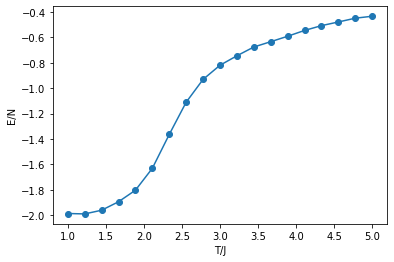

In [ ]:
plt.plot(t,E, 'o-', )
plt.xlabel("T/J")
plt.ylabel("E/N")

plt.show()

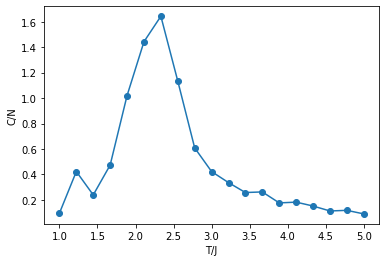

In [ ]:
plt.plot(t,C,'o-')
plt.xlabel("T/J")
plt.ylabel("C/N")
plt.show()

In [ ]:
from PIL import Image
import numpy as np
from numpy.random import rand 
from ipywidgets import interact

def random_spin_field(N, M):
    return np.random.choice([-1, 1], size=(N, M))


def display_spin_field(field):
    return Image.fromarray(np.uint8((field + 1) * 0.5 * 255))  # 0 ... 255

conf=random_spin_field(10,10)
n=len(conf)

def metropolis_2d(config, J, kT):
    N=len(config)
    i=0
    
    for i in range(N):
        for j in range(N):    
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost/kT):
                    s *= -1
                config[a, b] = s
                    
    return config


In [ ]:
def energy(config):
    
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/2

In [ ]:
nt = 30        
N  = 10        
eqSteps = 100      
mcSteps = 100      

T = np.linspace(1, 5, nt); 
E_1 = np.zeros(nt)
C_1=np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 

In [ ]:
for tt in range(nt):
    E1 = M1 = E2 = M2 = 0
    config = conf
    iT=T[tt]; iT2=iT*iT;
    
    for i in range(eqSteps):        
        metropolis_2d(config,1, iT)          

    for i in range(mcSteps):
        metropolis_2d(config,1, iT)           
        Ene = energy(config)    
              

        E1 = E1 + Ene
        E2 = E2 + Ene*Ene


    E_1[tt] = n1*E1
    C_1[tt]=(n1*E2 - n2*E1*E1)/iT2

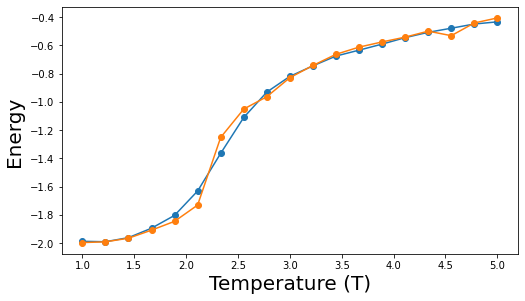

In [ ]:
f = plt.figure(figsize=(18, 10));   

sp =  f.add_subplot(2, 2, 1 );
plt.plot(t,E, 'o-')
plt.plot(T, E_1, 'o-')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         


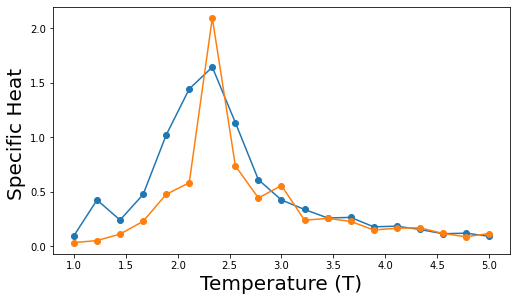

In [ ]:
f = plt.figure(figsize=(18, 10)); # plot the calculated values    

sp =  f.add_subplot(2, 2, 1 );
plt.plot(t,C,'o-')
plt.plot(T, C_1, 'o-')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Specific Heat ", fontsize=20);         


Литература

1. N. Prokof’ev and B. Svistunov, “Worm Algorithms for Classical Statistical Models”,

2. Simulating graphene impurities using the worm algorithm
Marcin Szyniszewski, BSc, Major Physics Project
Supervisor: Evgeni Burovski, PhD
Department of Physics, Lancaster University


